In [1]:
import warnings; warnings.simplefilter('ignore')

In [2]:
from orion.data import load_signal

data = load_signal('exchange-2_cpm_results')
data.shape

(1624, 2)

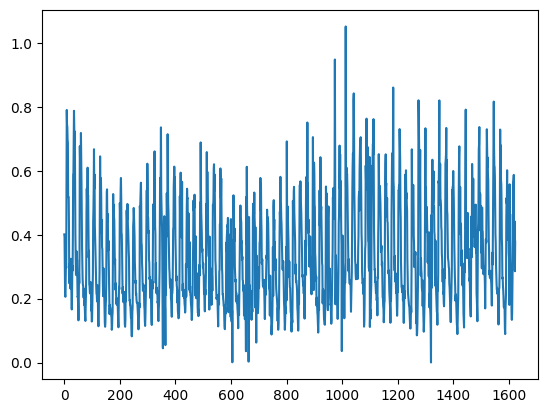

In [3]:
import matplotlib.pyplot as plt

plt.plot(data['value']);

In [4]:
from mlblocks import MLPipeline, add_pipelines_path, add_primitives_path
pipeline = MLPipeline('mistral_prompter')

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
hyperparameters = {
    "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
        "interval": 3600
    }, 
    "sigllm.primitives.prompting.anomalies.ano_within_windows#1": {
        "alpha": 1.0
    },
    "sigllm.primitives.prompting.anomalies.merge_anomaly_seq#1": {
        "beta": 1.0
    }
}

pipeline.set_hyperparameters(hyperparameters)

In [6]:
pipeline.primitives

['mlstars.custom.timeseries_preprocessing.time_segments_aggregate',
 'sklearn.impute.SimpleImputer',
 'sigllm.primitives.transformation.Float2Scalar',
 'sigllm.primitives.prompting.timeseries_preprocessing.rolling_window_sequences',
 'sigllm.primitives.transformation.format_as_string',
 'sigllm.primitives.prompting.huggingface.HF',
 'sigllm.primitives.transformation.format_as_integer',
 'sigllm.primitives.prompting.anomalies.val2idx',
 'sigllm.primitives.prompting.anomalies.ano_within_windows',
 'sigllm.primitives.prompting.anomalies.merge_anomaly_seq',
 'sigllm.primitives.prompting.anomalies.idx2time',
 'sigllm.primitives.prompting.anomalies.timestamp2interval']

time segment aggerate

In [7]:
step = 0
context = pipeline.fit(data, start_=step, output_=step)
context.keys()

dict_keys(['X', 'timestamp'])

In [8]:
for i, x in list(zip(context['timestamp'], context['X']))[:5]:
    print("entry at {} has value {}".format(i, x))

entry at 1309471201 has value [0.4010481]
entry at 1309474801 has value [0.39271888]
entry at 1309478401 has value [0.30999612]
entry at 1309482001 has value [0.21293855]
entry at 1309485601 has value [0.20580091]


In [9]:
context['X'].shape

(1648, 1)

Single Imputer

In [10]:
step = 1
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'X'])

Float2Scalar

In [11]:
step = 2
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'X', 'minimum'])

In [12]:
for i, x in list(zip(context['timestamp'], context['X']))[:5]:
    print("entry at {} has value {}".format(i, x))

entry at 1309471201 has value [40]
entry at 1309474801 has value [39]
entry at 1309478401 has value [30]
entry at 1309482001 has value [21]
entry at 1309485601 has value [20]


In [13]:
context['minimum']

0.000385004945833

Rolling Window

In [14]:
step = 3
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'minimum', 'X', 'first_index', 'window_size', 'step_size'])

In [15]:
# after slicing X into multiple sub-sequences
# we obtain a 3 dimensional matrix X where
# the shape indicates (# slices, window size, 1)

print("X shape = {}\nTimestamp shape = {}\nFirst index shape = {}".format(
    context['X'].shape, context['timestamp'].shape, context['first_index'].shape))

X shape = (37, 200, 1)
Timestamp shape = (1648,)
First index shape = (37,)


Format as string

In [16]:
step = 4
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'minimum', 'first_index', 'window_size', 'step_size', 'X', 'X_str'])

In [17]:
context['X_str'].flatten().tolist()[0]

'40,39,30,21,20,25,30,29,53,78,74,73,69,68,51,51,51,41,24,30,27,26,23,26,32,25,21,16,21,30,28,39,58,59,71,78,73,68,72,52,40,34,27,27,34,28,32,25,20,20,17,13,17,27,24,34,67,62,60,59,71,63,56,43,36,30,26,24,24,20,20,23,17,19,16,14,12,16,21,28,47,54,50,53,60,51,52,42,32,34,24,24,21,21,22,25,22,16,17,12,13,17,22,27,44,47,54,66,54,58,42,39,36,32,27,23,21,21,19,24,22,19,13,11,15,20,22,28,47,64,52,57,57,51,40,44,36,35,28,24,20,29,21,22,21,16,12,11,12,17,19,24,40,53,54,43,46,43,34,38,32,25,22,15,18,17,17,15,16,14,14,10,11,14,15,31,52,43,49,45,44,36,30,32,22,24,22,19,18,20,19,17,19,15,12,11,17,23,22,29'

In [18]:
type(context['X_str'][0][0])

numpy.str_

HF

In [19]:
step = 5
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

  0%|                                                    | 0/37 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
2024-09-19 13:22:37.977012: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 13:22:37.977047: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 13:22:37.977082: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 13:22:37.983817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following ins

dict_keys(['timestamp', 'minimum', 'first_index', 'window_size', 'step_size', 'X_str', 'X', 'y_hat'])

In [20]:
context['y_hat'][:2]

[['16,13,17,12,11,15,14,14,10,11,14,15,31,52,53,43,46,43,34,38,32,25,22,18,15,17,19,15,17,12,11,17,23,22,29,51,51,51,41,34,27,27,34,28,32,25,20,20,23,17,19,16,14,12,16,21,28,47,54,50,53,60,51,52,42,32,34,24,24,21,21,22,25,22,16,17,12,13,17,22,27,44,47,54,66,54,58,42,39,36,32,27,23,21,21,19,24,22,19,13,1',
  '16,13,17,24,21,14,12,11,15,18,14,10,11,14,15,31,52,59,44,47,67,62,60,59,71,73,78,72,73,72,68,63,56,53,43,36,34,32,35,38,25,22,21,22,16,12,11,12,17,19,27,44,47,54,66,58,34,39,36,32,23,21,19,24,22,13,11,15,15,20,22,28,47,54,50,53,60,51,52,42,34,32,21,22,25,22,19,17,19,15,12,11,17,23,22,29,47,53,49,45,4',
  '30,25,23,32,41,16,13,17,53,78,51,51,51,24,19,34,67,62,59,71,63,56,43,36,30,17,13,17,24,44,47,54,66,54,58,39,32,15,18,17,15,10,11,15,31,52,49,45,38,22,19,18,17,19,15,12,17,23,31,52,40,44,35,38,25,15,18,17,11,11,15,14,14,10,11,22,25,34,54,43,49,45,36,35,28,24,29,21,12,11,12,17,19,24,40,53,46,43,36,24,3',
  '16,13,17,12,11,15,14,14,10,11,14,15,23,19,18,20,19,15,11,17,22,31,52,43,49,4

format as integer

In [21]:
step = 6
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'minimum', 'first_index', 'window_size', 'step_size', 'X_str', 'y_hat', 'X', 'y'])

In [22]:
context['y'][:2]

array([[array([16., 13., 17., 12., 11., 15., 14., 14., 10., 11., 14., 15., 31.,
               52., 53., 43., 46., 43., 34., 38., 32., 25., 22., 18., 15., 17.,
               19., 15., 17., 12., 11., 17., 23., 22., 29., 51., 51., 51., 41.,
               34., 27., 27., 34., 28., 32., 25., 20., 20., 23., 17., 19., 16.,
               14., 12., 16., 21., 28., 47., 54., 50., 53., 60., 51., 52., 42.,
               32., 34., 24., 24., 21., 21., 22., 25., 22., 16., 17., 12., 13.,
               17., 22., 27., 44., 47., 54., 66., 54., 58., 42., 39., 36., 32.,
               27., 23., 21., 21., 19., 24., 22., 19., 13.,  1.])              ,
        array([16., 13., 17., 24., 21., 14., 12., 11., 15., 18., 14., 10., 11.,
               14., 15., 31., 52., 59., 44., 47., 67., 62., 60., 59., 71., 73.,
               78., 72., 73., 72., 68., 63., 56., 53., 43., 36., 34., 32., 35.,
               38., 25., 22., 21., 22., 16., 12., 11., 12., 17., 19., 27., 44.,
               47., 54., 66., 58., 34.,

In [23]:
context['y'].shape

(37, 10)

Val2idx

In [24]:
step = 7
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'minimum', 'first_index', 'window_size', 'step_size', 'X_str', 'y_hat', 'X', 'y'])

In [25]:
context['y'][:2]

array([[array([  1,   3,   4,   5,   7,   8,  14,  15,  16,  17,  18,  20,  22,
                24,  25,  26,  27,  28,  30,  31,  32,  39,  41,  42,  43,  44,
                45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  58,  63,
                64,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
                79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
                92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
               105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
               118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 133,
               135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
               149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
               163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
               176, 177, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191,
               192, 193, 194, 195, 196, 

Ano_within_window

In [26]:
step = 8
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'minimum', 'first_index', 'window_size', 'step_size', 'X_str', 'y_hat', 'X', 'y'])

In [27]:
context['y'][:2]

array([array([  3,  14,  15,  16,  18,  22,  24,  26,  27,  28,  41,  44,  46,
               50,  51,  52,  54,  55,  63,  64,  67,  68,  71,  72,  73,  74,
               75,  76,  77,  78,  80,  81,  85,  88,  89,  90,  91,  92,  93,
               94,  96,  97,  98,  99, 100, 101, 102, 104, 105, 106, 108, 112,
              113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128,
              133, 135, 136, 139, 142, 143, 144, 145, 146, 147, 148, 149, 150,
              151, 154, 155, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167,
              168, 169, 170, 171, 172, 173, 174, 175, 177, 180, 181, 183, 184,
              185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198]),
       array([  6,   8,   9,  10,  11,  12,  26,  29,  30,  32,  33,  34,  35,
               36,  37,  48,  54,  56,  57,  58,  59,  60,  61,  62,  73,  78,
               80,  81,  82,  83,  84,  85,  86, 100, 103, 105, 106, 107, 108,
              109, 110, 120, 122, 123, 124, 125, 1

In [28]:
context['y'].shape

(37,)

Merge anomaly seq

In [29]:
step = 9
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'minimum', 'first_index', 'window_size', 'step_size', 'X_str', 'y_hat', 'X', 'y'])

In [30]:
context['y'].shape

(17,)

Index2time

In [31]:
step = 10
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'minimum', 'first_index', 'window_size', 'step_size', 'X_str', 'y_hat', 'X', 'y'])

In [32]:
context['y'].shape

(17,)

timestamp2interval

In [33]:
step = 11
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['timestamp', 'minimum', 'first_index', 'window_size', 'step_size', 'X_str', 'y_hat', 'X', 'y', 'df'])

In [34]:
context['df']

,start,end,score
0,1310119201,1310796001,0
1,1310936401,1311379201,0
2,1311415201,1312736401,0


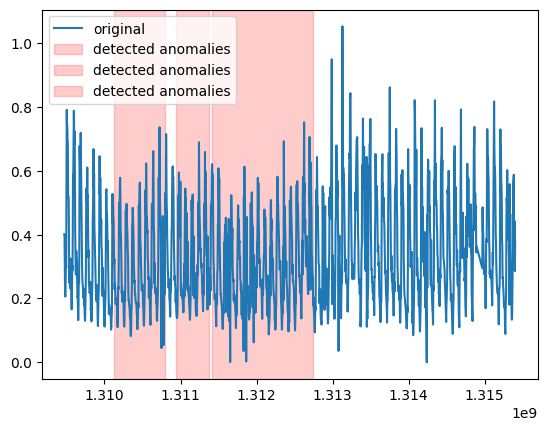

In [37]:
index, anomalies = list(map(context.get, ['timestamp', 'df']))

plt.plot(data['timestamp'], data['value'], label='original')

plt.axvspan(anomalies.iloc[0]['start'].item(), anomalies.iloc[0]['end'].item(), color='r', alpha=0.2, label='detected anomalies')
plt.axvspan(anomalies.iloc[1]['start'].item(), anomalies.iloc[1]['end'].item(), color='r', alpha=0.2, label='detected anomalies')
plt.axvspan(anomalies.iloc[2]['start'].item(), anomalies.iloc[2]['end'].item(), color='r', alpha=0.2, label='detected anomalies')

plt.legend();